In [139]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator


In [125]:
Countries_df = pd.read_csv("../Data/Processed/Countries_df.csv")
Regions_df = pd.read_csv("../Data/Processed/Region_df.csv")
worldwide_df = pd.read_csv("../Data/Processed/worldwide_df.csv")

1. Trend Analysis:
- How have CO₂ emissions in each sector changed over time?
- What are the significant peaks and valleys in emissions, and how do they correlate with historical events or policy changes?

2. Sector Comparison:
- What is the relative contribution of each sector to total emissions in different years?
- Which sectors have been most effective in reducing their emissions?

3. Geospatial Analysis:
- How are CO₂ emissions distributed globally?
- Where are the “hotspots” of emissions, i.e., areas with particularly high emissions?

4. Predictive Modeling:
- How can machine learning techniques be used to predict future CO₂ emissions based on historical trends?
- What is the potential impact of different emission reduction policies?

5. Correlation Analysis:
- What is the correlation between CO₂ emissions and socioeconomic factors such as GDP, population, or energy consumption?
- How do CO₂ emissions correlate with climate indicators like global temperature?

6. Data Visualization:
- How can interactive dashboards in Power BI or Tableau be used to dynamically visualize and explore the data?
- What key findings can be summarized in infographics to effectively communicate the results?

In [126]:
Countries_df.head()

,Entity,Code,Year,Carbon dioxide emissions from buildings,Carbon dioxide emissions from industry,Carbon dioxide emissions from land use change and forestry,Carbon dioxide emissions from other fuel combustion,Carbon dioxide emissions from transport,Carbon dioxide emissions from manufacturing and construction,Fugitive emissions of carbon dioxide from energy production,Carbon dioxide emissions from electricity and heat,Carbon dioxide emissions from bunker fuels
0,Afghanistan,AFG,1990,129999.99,50000.0,-2390000.0,NaN,980000.0,570000.0,NaN,320000.0,20000.0
1,Afghanistan,AFG,1991,140000.00,50000.0,-2390000.0,NaN,930000.0,530000.0,NaN,300000.0,20000.0
2,Afghanistan,AFG,1992,150000.00,50000.0,-2390000.0,NaN,740000.0,390000.0,NaN,200000.0,20000.0
3,Afghanistan,AFG,1993,160000.00,50000.0,-2390000.0,NaN,740000.0,380000.0,NaN,200000.0,20000.0
4,Afghanistan,AFG,1994,160000.00,50000.0,-2390000.0,NaN,730000.0,360000.0,NaN,190000.0,20000.0


# 1. Trend Analysis:
- How have CO₂ emissions in each sector changed over time?
- What are the significant peaks and valleys in emissions, and how do they correlate with historical events or policy changes?

In [127]:
# How have CO₂ emissions in each sector changed over time?
co2_per_year = Countries_df.iloc[:,2:].groupby("Year").sum()
co2_per_year_sum = co2_per_year.sum(axis=1)

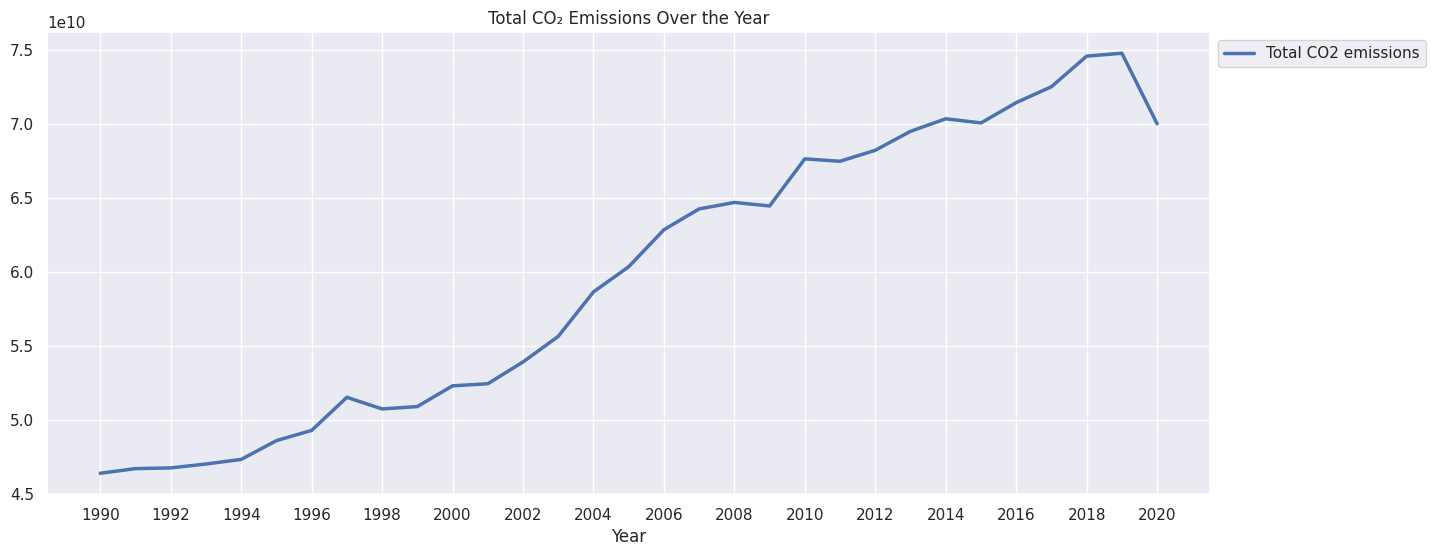

In [157]:
plt.figure(figsize=(15,6))
sns.lineplot(data=co2_per_year_sum, linewidth= 2.5, label="Total CO2 emissions")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.title("Total CO₂ Emissions Over the Year")

# Increase the number of ticks on the x-axis
plt.gca().xaxis.set_major_locator(MaxNLocator(nbins=20))

# Add vertical guidelines
sns.set_style(style="darkgrid")

The analysis of CO2 emissions from 1990 to 2020 reveals a general upward trend, with emissions increasing almost every year. Notable exceptions to this trend occurred in 1998, 2000, 2008, 2010, and 2020. The most significant decrease was observed in 2020, primarily due to the global impact of the COVID-19 pandemic, which led to reduced industrial activity and transportation.

# 2. Sector Comparison:
- What is the relative contribution of each sector to total emissions in different years?
- Which sectors have been most effective in reducing their emissions?

Text(0.5, 1.0, 'Mundial CO₂ Emissions Over the Year')

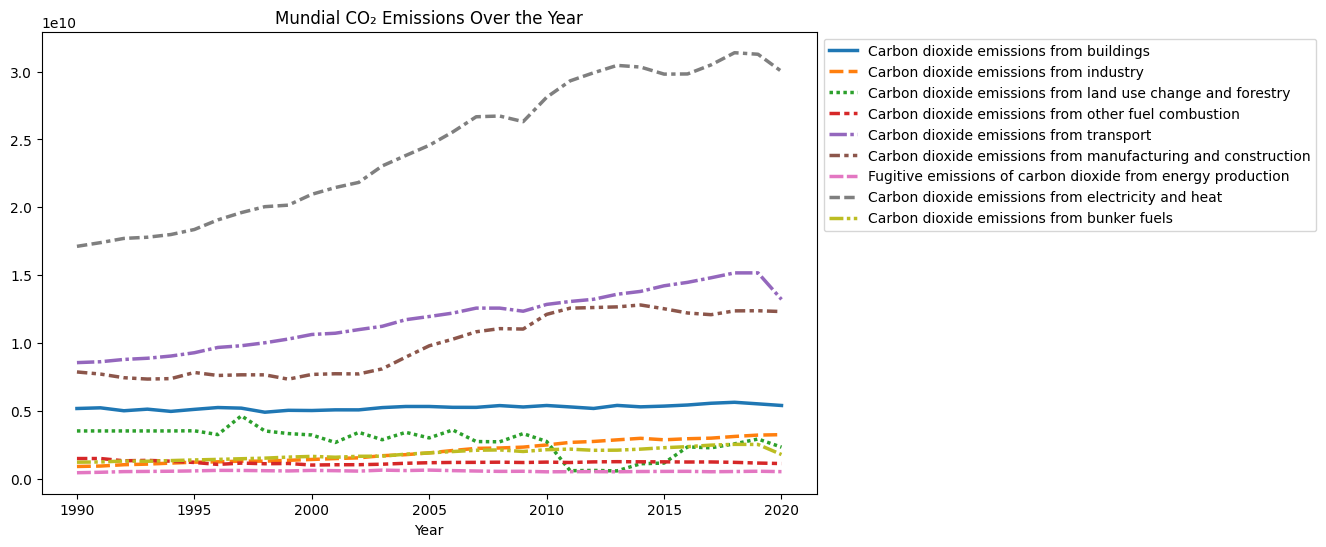

In [132]:
plt.figure(figsize=(10,6))
sns.lineplot(data=co2_per_year, linewidth= 2.5)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.title("Mundial CO₂ Emissions Over the Year")

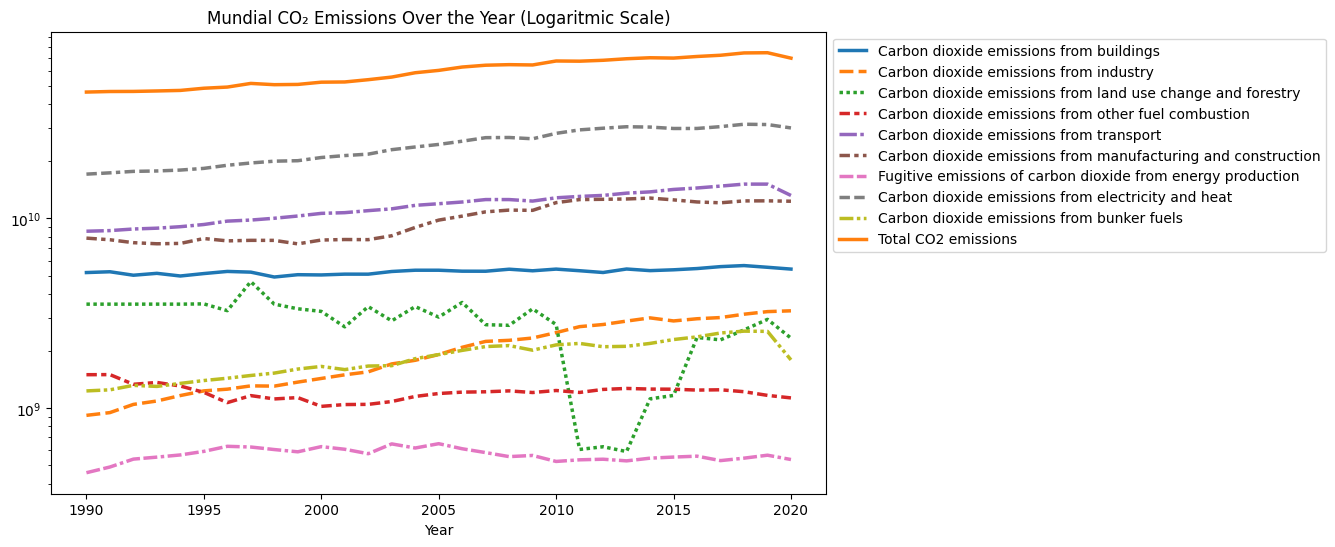

In [129]:
plt.figure(figsize=(10,6))
sns.lineplot(data=co2_per_year, linewidth= 2.5)
sns.lineplot(data=co2_per_year_sum, linewidth= 2.5, label="Total CO2 emissions")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.title("Mundial CO₂ Emissions Over the Year (Logaritmic Scale)")
plt.yscale("log")

### Why that strong reduction around 2010 on CO2 emissions from land use change and forestry?

In [130]:
# What happened on 2010 on land use and foresty?
forestry_df = Regions_df[["Entity", "Year", "Carbon dioxide emissions from land use change and forestry"]]
forestry_df = forestry_df.pivot(index="Year", columns="Entity", values="Carbon dioxide emissions from land use change and forestry")

# Removing columns that aren't continents since those are just group of regions (duplicated data)
columns_to_remove = ["High-income countries", "Low-income countries", "Upper-middle-income countries", "Lower-middle-income countries", "European Union (27)"]
forestry_df.drop(columns=columns_to_remove, axis=1, inplace=True)

forestry_df.head()

Entity,Africa,Asia,Europe,North America,Oceania,South America
Year,,,,,,
1990,960360000.0,113909970.0,-610740000.0,-265209980.0,49260000.0,1.515140e+09
1991,960360000.0,113909970.0,-610740000.0,-265209980.0,49230000.0,1.515140e+09
1992,960360000.0,113919976.0,-610780000.0,-265209980.0,49230000.0,1.515140e+09
1993,960360000.0,113839976.0,-610840000.0,-265359980.0,49230000.0,1.515870e+09
1994,960340030.0,113780024.0,-610930000.0,-265509980.0,49230000.0,1.515870e+09


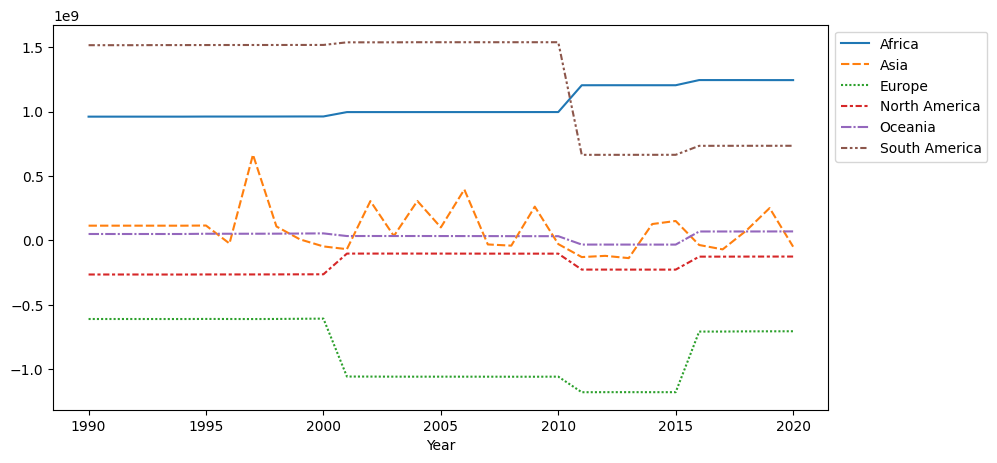

In [131]:
plt.figure(figsize=(10,5))
sns.lineplot(data=forestry_df)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))


Around 2010, Latin America experienced a significant reduction in CO2 emissions from land use change and forestry. This decrease was largely due to several key initiatives:

Brazil’s Amazon Fund: Established in 2008, this fund provided financial incentives for reducing deforestation and promoting sustainable forest management.
REDD+ Programs: Many countries in the region participated in the United Nations’ REDD+ program, which offered financial rewards for reducing emissions from deforestation and forest degradation.
Strengthened National Policies: Countries like Brazil and Peru enhanced their environmental policies and enforcement mechanisms, including satellite monitoring and stricter penalties for illegal logging.
International Support: Increased international funding and support for conservation projects helped implement more effective forest management practices.
Note: This reduction in CO2 emissions was part of a broader global trend, with significant decreases observed worldwide due to environmental efforts, except in Africa where emissions continued to rise.

Around 2015, CO2 emissions from land use change and forestry in Latin America began to increase again. This resurgence was driven by several factors:

Economic Pressures: Economic growth and increased demand for agricultural products led to higher rates of deforestation as land was cleared for farming and livestock.
Policy Changes: Some countries experienced rollbacks or weakening of environmental policies and enforcement, reducing the effectiveness of previous conservation efforts.
Illegal Logging: Increased illegal logging activities, driven by high market demand for timber, contributed to higher emissions.
Infrastructure Development: Expansion of infrastructure, such as roads and urban areas, also led to more deforestation and land use changes.
These factors combined to reverse some of the progress made in reducing emissions from land use change and forestry in the region.

source: [ESSD on Carbon Emissions](https://essd.copernicus.org/articles/15/2025/2023/)

# 3. Geospatial Analysis:
- How are CO₂ emissions distributed globally?
- Where are the “hotspots” of emissions, i.e., areas with particularly high emissions?

In [252]:
# Removing rows that aren't continents since those are just group of regions (duplicated data)
rows_to_remove = ["High-income countries", "Low-income countries", "Upper-middle-income countries", "Lower-middle-income countries", "European Union (27)"]

region_comparasion = Regions_df[~Regions_df["Entity"].isin(rows_to_remove)]
region_comparasion["Total Emissions"] = region_comparasion.iloc[:,2:].sum(axis=1)
region_comparasion.head()

/tmp/ipykernel_444/1445394445.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  region_comparasion["Total Emissions"] = region_comparasion.iloc[:,2:].sum(axis=1)


,Entity,Year,Carbon dioxide emissions from buildings,Carbon dioxide emissions from industry,Carbon dioxide emissions from land use change and forestry,Carbon dioxide emissions from other fuel combustion,Carbon dioxide emissions from transport,Carbon dioxide emissions from manufacturing and construction,Fugitive emissions of carbon dioxide from energy production,Carbon dioxide emissions from electricity and heat,Carbon dioxide emissions from bunker fuels,Total Emissions
0,Africa,1990,43130000.0,22770000.0,960360000.0,9180000.0,112300000.0,117369990.0,70380000.0,241970000.0,28090000.0,1.605550e+09
1,Africa,1991,44239996.0,24380002.0,960360000.0,9690001.0,117560000.0,109810010.0,80090000.0,247780000.0,28510000.0,1.622420e+09
2,Africa,1992,45270000.0,24760000.0,960360000.0,9670000.0,123369990.0,106540000.0,80540000.0,253550000.0,30710000.0,1.634770e+09
3,Africa,1993,47690000.0,24400000.0,960360000.0,11870000.0,122450000.0,98890000.0,86689990.0,265970000.0,30650000.0,1.648970e+09
4,Africa,1994,47670000.0,24900000.0,960340030.0,13000000.0,123950000.0,91250000.0,92789990.0,271810000.0,36160000.0,1.661870e+09


<Axes: xlabel='Year', ylabel='Total Emissions'>

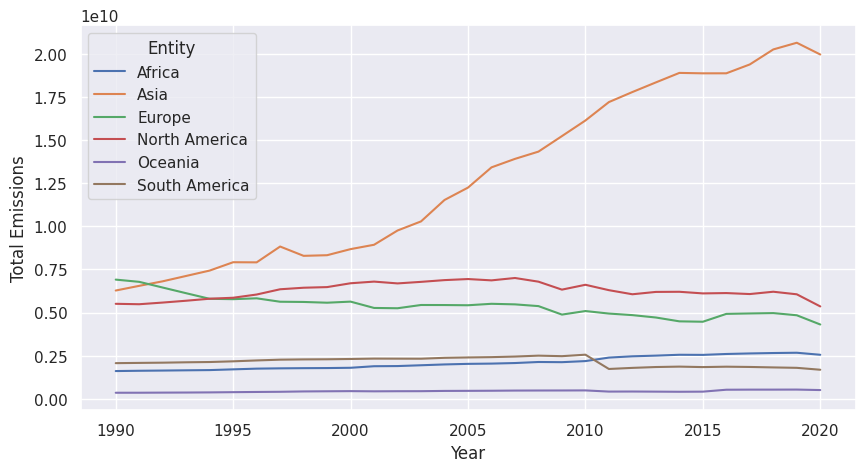

In [255]:
plt.figure(figsize=(10,5))
sns.lineplot(data= region_comparasion, x="Year", y="Total Emissions", hue="Entity")